In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pickle

In [2]:
BASE_DIR = '/'.join(str.split(os.path.abspath('') , '/')[:-3])
sys.path.append(BASE_DIR)
DATA_DIR = BASE_DIR + '/out'

exp_dir = '/2020-02-25_18-18-41'
# exp_dir = '/2020-02-24_09-19-11'

In [3]:
it = 30
n_a = 3
dt = 0.1

plot_int = 3

it_dir = DATA_DIR + exp_dir + ('/it_%i' % (it))

x_cls = pickle.load(open(it_dir + '/x_cls.pkl', 'rb'))
u_cls = pickle.load(open(it_dir + '/u_cls.pkl', 'rb'))
x_ol = pickle.load(open(it_dir + '/x_ol.pkl', 'rb'))
u_ol = pickle.load(open(it_dir + '/u_ol.pkl', 'rb'))

Text(0.5,1,u'Acceleration [m/(s^2)]')

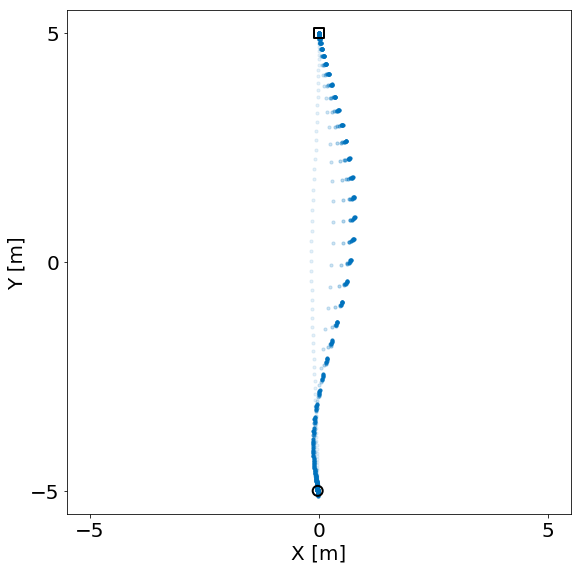

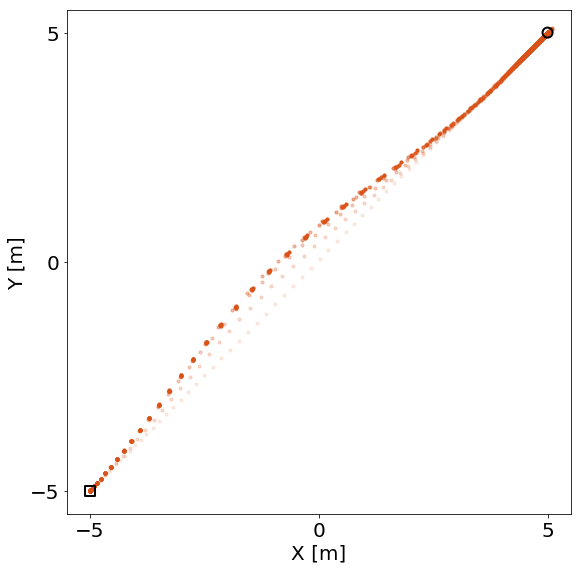

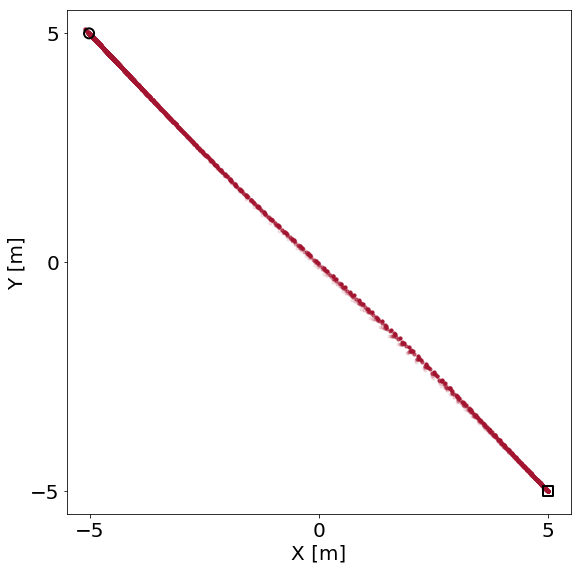

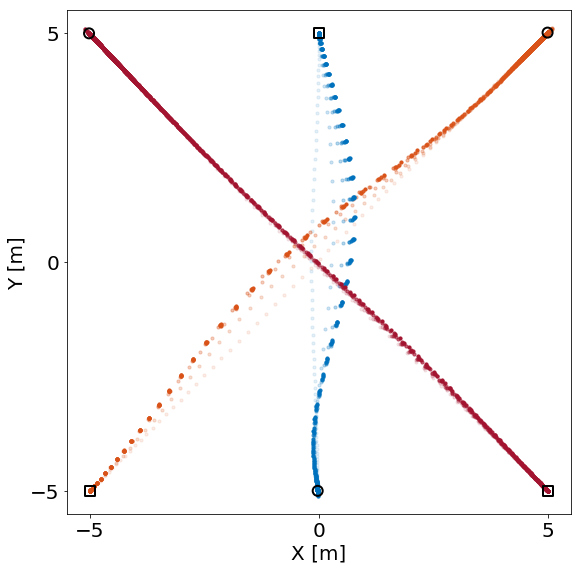

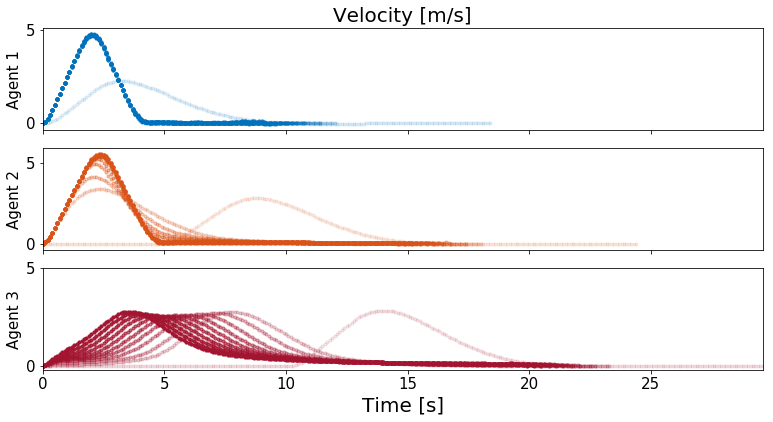

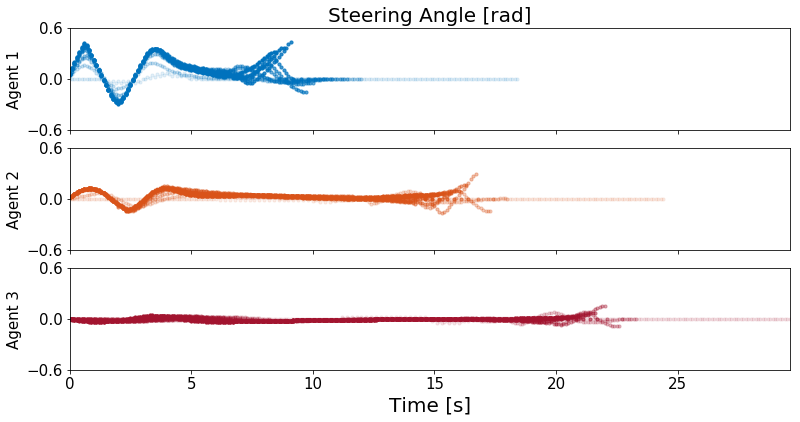

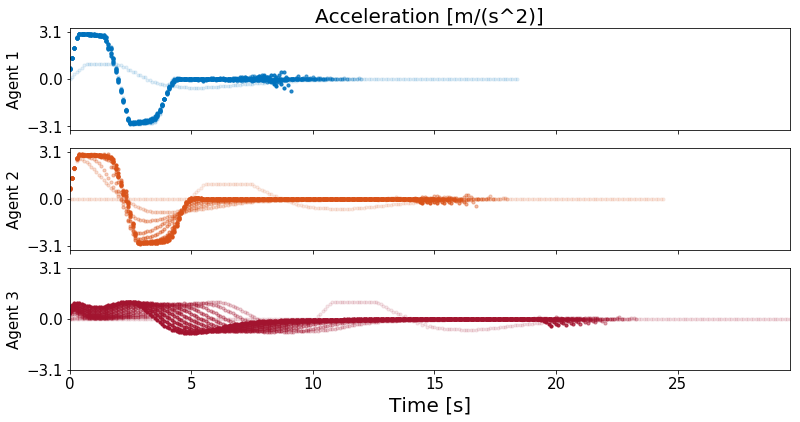

In [4]:
# Plot closed loop trajectories
x_lim = [-5.5, 5.5]
y_lim = [-5.5, 5.5]
pos_fig_w = 7
pos_fig_h = 7
fig_w = 10
fig_h = 5

pos_figs = [plt.figure(figsize=(pos_fig_w, pos_fig_h)) for _ in range(n_a)]
pos_axs = [f.add_axes([1,1,1,1]) for f in pos_figs]

all_pos_fig = plt.figure(figsize=(pos_fig_w, pos_fig_h))
all_pos_ax = all_pos_fig.add_axes([1,1,1,1])

# psi_fig = plt.figure(figsize=(fig_w, fig_h))
# psi_ax = psi_fig.add_axes([1,1,1,1])

vel_fig = plt.figure(figsize=(fig_w, fig_h))
vel_axs = [vel_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]

df_fig = plt.figure(figsize=(fig_w, fig_h))
df_axs = [df_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]

a_fig = plt.figure(figsize=(fig_w, fig_h))
a_axs = [a_fig.add_axes([0,(n_a-1-i)*1.0/n_a,1,1.0/n_a-0.05]) for i in range(n_a)]

agent_colors = np.array([[0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.6350, 0.0780, 0.1840]])

max_t = 0

n_cls = len(x_cls)
plot_cls = range(0, n_cls, plot_int)
if plot_cls[-1] != n_cls-1:
    plot_cls.append(n_cls - 1)
    
# for i in range(len(x_cls)):
for i in plot_cls:
    it_x_cl = x_cls[i]
    it_u_cl = u_cls[i]
    for j in range(n_a):
        alpha = 0.1 + 0.9 * (float(i)/(len(x_cls)-1))
        agent_x_cl = it_x_cl[j]
        agent_u_cl = it_u_cl[j]
        t_vec = dt*np.arange(agent_x_cl.shape[1])
        if t_vec[-1] > max_t:
            max_t = t_vec[-1]
        
        pos_axs[j].scatter(agent_x_cl[0,:], agent_x_cl[1,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        all_pos_ax.scatter(agent_x_cl[0,:], agent_x_cl[1,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
#         psi_ax.scatter(t_vec, agent_x_cl[2,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        vel_axs[j].scatter(t_vec, agent_x_cl[3,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        df_axs[j].scatter(t_vec, agent_u_cl[0,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        a_axs[j].scatter(t_vec, agent_u_cl[1,:], c=agent_colors[j].reshape((1,-1)), alpha=alpha, s=10)
        
for j in range(n_a):
    pos_axs[j].scatter(x_cls[0][j][0,0], x_cls[0][j][1,0], marker='s', s=100, facecolors='none', edgecolors='k', linewidth=2)
    pos_axs[j].scatter(x_cls[0][j][0,-1], x_cls[0][j][1,-1], marker='o', s=100, facecolors='none', edgecolors='k', linewidth=2)
    pos_axs[j].set_aspect('equal')
    pos_axs[j].set_xlabel('X [m]', fontsize=20)
    pos_axs[j].set_ylabel('Y [m]', fontsize=20)
    pos_axs[j].set_xlim(x_lim)
    pos_axs[j].set_ylim(y_lim)
    pos_axs[j].set_xticks([-5, 0, 5])
    pos_axs[j].set_yticks([-5, 0, 5])
    plt.setp(pos_axs[j].get_xticklabels(), fontsize=20)
    plt.setp(pos_axs[j].get_yticklabels(), fontsize=20)
    
    all_pos_ax.scatter(x_cls[0][j][0,0], x_cls[0][j][1,0], marker='s', s=100, facecolors='none', edgecolors='k', linewidth=2)
    all_pos_ax.scatter(x_cls[0][j][0,-1], x_cls[0][j][1,-1], marker='o', s=100, facecolors='none', edgecolors='k', linewidth=2)
    
    vel_axs[j].set_xlim([0,max_t])
    vel_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
    vel_axs[j].set_yticks([0, 5])
    plt.setp(vel_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        vel_axs[j].set_xticklabels([])
        
    df_axs[j].set_xlim([0,max_t])
    df_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
    df_axs[j].set_yticks([-0.6, 0, 0.6])
    plt.setp(df_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        df_axs[j].set_xticklabels([])
        
    a_axs[j].set_xlim([0,max_t])
    a_axs[j].set_ylabel('Agent %i' % (j+1), fontsize=15)
    a_axs[j].set_yticks([-3.1, 0, 3.1])
    plt.setp(a_axs[j].get_yticklabels(), fontsize=15)
    if j < n_a-1:
        a_axs[j].set_xticklabels([])
    
all_pos_ax.set_xlabel('X [m]', fontsize=20)
all_pos_ax.set_ylabel('Y [m]', fontsize=20)
all_pos_ax.set_xlim(x_lim)
all_pos_ax.set_ylim(y_lim)
all_pos_ax.set_aspect('equal')
all_pos_ax.set_xticks([-5, 0, 5])
all_pos_ax.set_yticks([-5, 0, 5])
plt.setp(all_pos_ax.get_xticklabels(), fontsize=20)
plt.setp(all_pos_ax.get_yticklabels(), fontsize=20)

plt.setp(vel_axs[0].get_xticklabels(), fontsize=20)
vel_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(vel_axs[-1].get_xticklabels(), fontsize=15)
vel_axs[0].set_title('Velocity [m/s]', fontsize=20)

plt.setp(df_axs[0].get_xticklabels(), fontsize=20)
df_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(df_axs[-1].get_xticklabels(), fontsize=15)
df_axs[0].set_title('Steering Angle [rad]', fontsize=20)

plt.setp(a_axs[0].get_xticklabels(), fontsize=20)
a_axs[-1].set_xlabel('Time [s]', fontsize=20)
plt.setp(a_axs[-1].get_xticklabels(), fontsize=15)
a_axs[0].set_title('Acceleration [m/(s^2)]', fontsize=20)